## Pedro Vinicius Alves Silva - 10727865

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2, t,f
from scipy.spatial import distance
import seaborn as sns
from numpy.linalg import inv,eig, det
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Questão 2

Seja $\bar{x}$ o centróide da elipse que forma a região de confiança 

$$
\bar{x} = (0.564 , 0.603)^T
$$

Se $\lambda_i$ é o i-ésimo autovalor da matriz de covariância e $e_i$ é seu autovetor normalizado associado, temos que os eixos da elipse são dados por:
$$
\sqrt{\lambda_i}\sqrt{\frac{(n-1)p}{n-p}F_{p,n-p}}e_i
$$

In [10]:
s = np.array([[0.0144, 0.0117],[0.0117, 0.0146]])
auto = eig(s)
print(f'S = {s}')
print(f'Autovalores e autovetores associados: \n {auto}')


S = [[0.0144 0.0117]
 [0.0117 0.0146]]
Autovalores e autovetores associados: 
 (array([0.00279957, 0.02620043]), array([[-0.71012207, -0.70407858],
       [ 0.70407858, -0.71012207]]))


Logo, o comprimento dos eixos da elipse são dados por:

In [89]:
n = 42
p = 2
sig = 0.05
q = f.ppf(1-sig,p,n-p)
ma = np.sqrt(auto[0][0])*np.sqrt(q*(n-1)/(n-p))
me = np.sqrt(auto[0][1])*np.sqrt(q*(n-1)/(n-p))
print(ma, me)

0.09629974500676168 0.29460048196418404


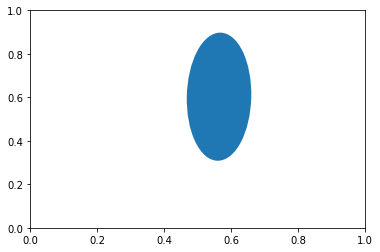

In [92]:
fig, axs = plt.subplots(1, 1)
angle = np.arctan(auto[1][1][0]/auto[1][0][0])

ell_radius_x = ma
ell_radius_y = me
ellipse = Ellipse((0.564, 0.603),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    angle = angle,
    facecolor=None)

scale_x = np.sqrt(s[0][0])
scale_y = np.sqrt(s[1][1])


axs.add_patch(ellipse)


$$
MA \pm 0.0962 (-0.7101, 0.7040)^T \\
ME  \pm 0.2945 (-0.7040, -0.7101)^T
$$

# Questão 4

Inicialmente precisamos verificar a suposição de normalidade de cada uma das populações de interesse, ou seja, de cada espécie de flor.

In [2]:
data = pd.read_csv('iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
#return np array with data of the selected species
def arr(data, species):
    array = data[data['variety'] == species]
    array = array.drop(['variety'], axis = 1)
    #array = array.to_numpy()
    
    return array


setosa = arr(data, 'Setosa')
virginica = arr(data, 'Virginica')
versicolor = arr(data, 'Versicolor')
    

## 2.1 Verificação de Normalidade

In [59]:
def qqplots(data):
    #df = data.drop(['variety'], axis = 1)
    for i in data['variety'].unique():
        df = data[data['variety'] == i]
        df = df.drop(['variety'], axis = 1)
        print(f'QQPlots for {i}')
        for j in df.columns: 
            print(j)
            sm.qqplot(df[j], fit=True, line="45")
            plt.show()
    

QQPlots for Setosa
sepal.length


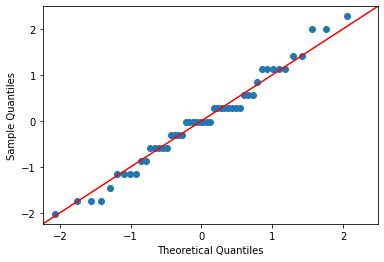

sepal.width


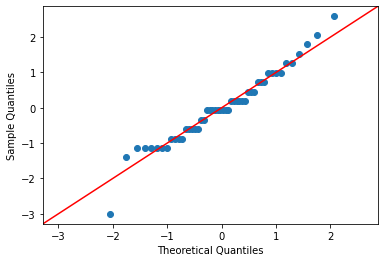

petal.length


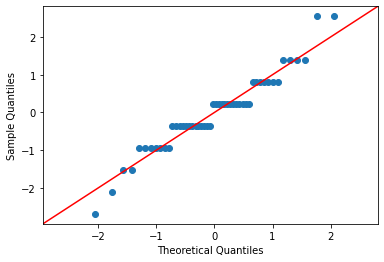

petal.width


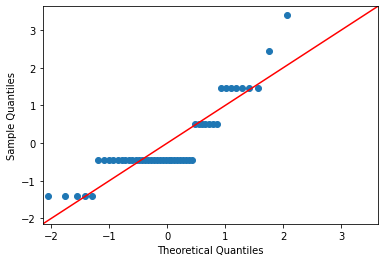

QQPlots for Versicolor
sepal.length


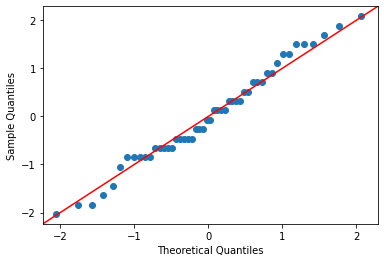

sepal.width


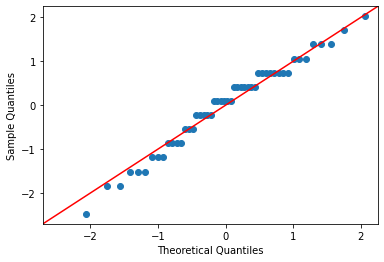

petal.length


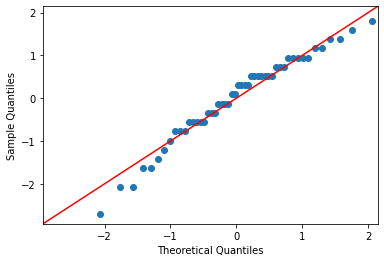

petal.width


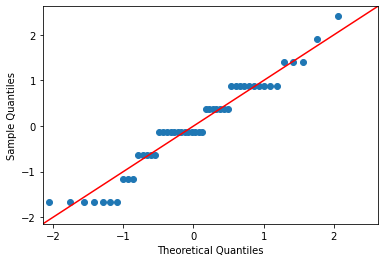

QQPlots for Virginica
sepal.length


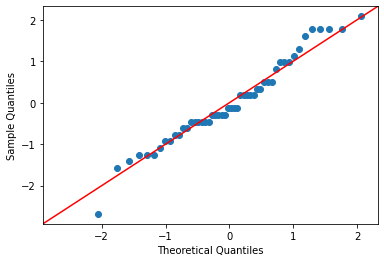

sepal.width


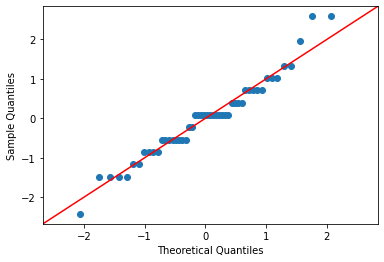

petal.length


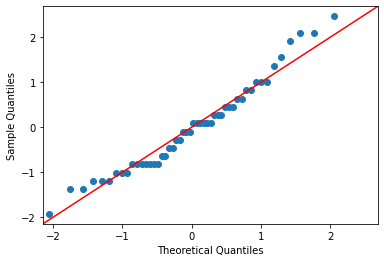

petal.width


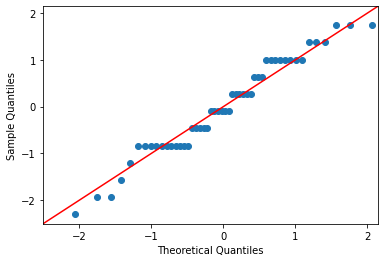

In [49]:
qqplots(data)

In [79]:
def normality_check(df):

    
    c = len(df.columns)
    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    df = df.to_numpy()
    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
        p1 = val
        p2 = centerpoint
        distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
        distances.append(distance)
    
    distances = np.array(distances)

    
    conf = []
    for i in distances:
        if i <= chi2.ppf(0.5,c):
            conf.append(i)
            
    res1 = len(conf)/len(distances)
    print(f'A porcentagem de observações menores do que o quantil de 50% da qui-quadrado com {c} graus de liberdade é de: {round(res1,3)}')
    return distances


#chiplot
def chi_plot(distances):

    
    n = len(distances)
    quantis = []
    for j in range(1,n+1):
        aux = (j-0.5)/n
        quantis.append(chi2.ppf(aux,4))
        
    x = np.arange(0, max(distances))
    sns.scatterplot(y = sorted(distances), x = quantis)
    sns.lineplot(x =x , y=x, color = 'purple')
    plt.xlabel('ChiSquare Quantile')
    plt.ylabel('Distance')
    plt.title('ChiSquare Plot')
    plt.show()

def normality_check_flower(data):
    for i in data['variety'].unique(): 
        array = data[data['variety'] == i]
        array = array.drop(['variety'], axis = 1)
        print(f'Para a espécie {i}')
        distances = normality_check(array)
        chi_plot(distances)

Para a espécie Setosa
A porcentagem de observações menores do que o quantil de 50% da qui-quadrado com 5 graus de liberdade é de: 0.68


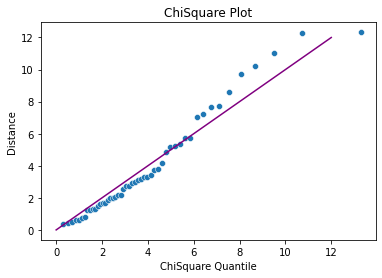

Para a espécie Versicolor
A porcentagem de observações menores do que o quantil de 50% da qui-quadrado com 5 graus de liberdade é de: 0.6


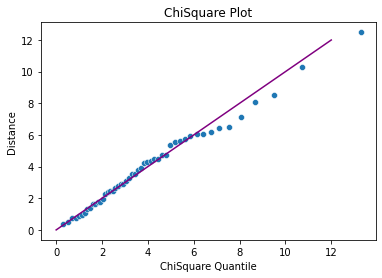

Para a espécie Virginica
A porcentagem de observações menores do que o quantil de 50% da qui-quadrado com 5 graus de liberdade é de: 0.7


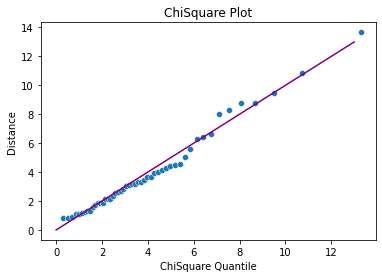

In [75]:
normality_check_flower(data)

Assim concluímos que as 3 populações de interesse provém de uma distribuição normal.

## MANOVA

In [7]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety']

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety'],
      dtype='object')

$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ vs $H_1 \mu_i \neq \mu_j (i,j) i,j = 1,2,3,4$

In [5]:
from statsmodels.multivariate.manova import MANOVA

fit = MANOVA.from_formula( 'sepal_length + sepal_width+petal_length + petal_width ~ variety', data=data)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        variety          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

Como o p-valor é muito baixo, ele é apresentado como 0. Isso nos indica de que a média das características analisadas das plantas é diferente para pelo menos um par de espécies, mas não nos indica entre quais espécies há essa diferença.

In [4]:
setosa_vector = setosa.mean().to_numpy()
versicolor_vector = versicolor.mean().to_numpy()
virginica_vector = virginica.mean().to_numpy()

#data[data['variety'] == 'Setosa']

In [18]:
virginica.mean()

sepal.length    6.588
sepal.width     2.974
petal.length    5.552
petal.width     2.026
dtype: float64

In [5]:
#population and general means
pop_mean_matrix = np.array((setosa_vector,versicolor_vector, virginica_vector))
general_mean_matrix = data.drop(['variety'], axis = 1).mean().to_numpy()

In [6]:
treatment_effect = pop_mean_matrix - general_mean_matrix

In [7]:
pop_mean_matrix, general_mean_matrix

(array([[5.006, 3.428, 1.462, 0.246],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]),
 array([5.84333333, 3.05733333, 3.758     , 1.19933333]))

In [11]:
n = 50 
p = 4 #covariáveis
g = 3 # populações
alpha = 0.05
m = p*g*(g-1)/m
W = 49*setosa.cov().to_numpy() +49*virginica.cov().to_numpy() + 49*versicolor.cov().to_numpy()
q = t.ppf(alpha/(m), 150-g )
wii = W.diagonal()

In [12]:
ics = []
# i é a covariável e j com que espécie a setosa está sendo comparada, j=1 versicolor, j=2 virginica
for i in range(0,p):
    for j in range(1,3):
        diff = pop_mean_matrix[0][i] - pop_mean_matrix[j][i] 
        lq = t.ppf(alpha/m, 150-g )* np.sqrt((1/49 + 1/49)*wii[i]/(150-g))
        inf = diff + lq
        sup = diff - lq
        ics.append(('Setosa',data['variety'].unique()[j],setosa.columns[i] ,inf,sup))

In [13]:
ics = np.array(ics)
ics_df = pd.DataFrame(ics, columns = ['Espécie A', 'Espécie B','Covariável', 
                                     'Inf(95%)', 'Sup(95%)'])
ics_df

,Espécie A,Espécie B,Covariável,Inf(95%),Sup(95%)
0,Setosa,Versicolor,sepal.length,-1.232732066089699,-0.6272679339103022
1,Setosa,Virginica,sepal.length,-1.8847320660896973,-1.2792679339103006
2,Setosa,Versicolor,sepal.width,0.4582399394852197,0.857760060514781
3,Setosa,Virginica,sepal.width,0.2542399394852204,0.6537600605147817
4,Setosa,Versicolor,petal.length,-3.0510666594904943,-2.544933340509505
5,Setosa,Virginica,petal.length,-4.3430666594904945,-3.836933340509505
6,Setosa,Versicolor,petal.width,-1.2003484774939264,-0.9596515225060732
7,Setosa,Virginica,petal.width,-1.9003484774939263,-1.6596515225060733


Como nenhum intervalo de confiança contém 0, podemos afirmar que as médias de todas as características das flores diferem em relação a espécie.

# Questão 5.9

In [60]:
# Questâo 5.9
n = 61
names = ['Weight(kg)', 'Body length (cm)', 'Neck(cm)', 'Girth', 'Head length(cm)', 'Head width(cm)']
sample_mean = np.array([95.52,164.38,55.69,93.39,17.98,31.13])
cov = pd.read_csv('tables/table1.csv', sep = ',', header = None)
cov.to_numpy()

array([[3266.46, 1343.97,  731.54, 1175.5 ,  162.68,  238.37],
       [1343.97,  721.91,  324.25,  537.35,   80.17,  117.73],
       [ 731.54,  324.25,  179.28,  281.17,   39.15,   56.8 ],
       [1175.5 ,  537.35,  281.17,  474.98,   63.73,   94.85],
       [ 162.68,   80.17,   39.15,   63.73,    9.95,   13.88],
       [ 238.37,  117.73,   56.8 ,   94.85,   13.88,   21.26]])

## Item a - Interalos Simultâneos para Grandes Amostras

In [61]:
def ic_bear_t2_large(sig, cov, sample_mean,p,n,names):
    q = chi2.ppf(1-sig, df= p)
    cov_diag = cov.to_numpy().diagonal()
    res = []
    for i in range(0, len(sample_mean)):
        aux = np.sqrt(q*cov_diag[i]/n)
        inf = sample_mean[i] - aux
        sup = sample_mean[i] + aux
        res.append((names[i], inf,sup))
    
    return res
# item c - rever a funçao dos ics dps
ic_bear_t2_large = ic_bear_t2_large(0.05, cov, sample_mean, 6, n, names)
df_ic_bear_bonf = pd.DataFrame(ic_bear_t2_large, columns = ['Characteristic','Inf(95%)', 'Sup(95%)'])
df_ic_bear_bonf

,Characteristic,Inf(95%),Sup(95%)
0,Weight(kg),69.553465,121.486535
1,Body length (cm),152.172778,176.587222
2,Neck(cm),49.606672,61.773328
3,Girth,83.488227,103.291773
4,Head length(cm),16.546866,19.413134
5,Head width(cm),29.035131,33.224869


## Item b - Diferença de Médias para Weight e Girth

Selecionando as características 'weight' e 'girth', temos as seguintes quantidades:

In [62]:
from IPython.display import display, Latex
mean_weight_girth = np.array([sample_mean[0], sample_mean[3]])
cov_weight_girth = np.array([[cov[0][0], cov[0][3]],
                            [cov[0][3], cov[3][3]]])

display(Latex(f'Weight and Girth Mean $\mu$') )
print(mean_weight_girth)
display(Latex(f'Weight and Girth Covariance $S$') )
print(cov_weight_girth)

<IPython.core.display.Latex object>

[95.52 93.39]


<IPython.core.display.Latex object>

[[3266.46 1175.5 ]
 [1175.5   474.98]]


A região de $\alpha\%$ de confiança é definida como:
    
$$
(\mu - \mu_0)S^{-1}(\mu - \mu_0)^T \leq \frac{\chi^2_{1-\alpha,p}}{n}
$$

Se $\lambda_i$ é o i-ésimo autovalor da matriz de covariância e $e_i$ é seu autovetor normalizado associado, temos que os eixos da elipse são dados por:
$$
\sqrt{\lambda_i}\sqrt{\chi^2_{1-\alpha,p}}e_i
$$

In [82]:
axes = eig(cov_weight_girth)
inv_cov = inv(cov_weight_girth)
sig = 0.05
q = chi2.ppf(1-0.05, df= 6)
ma = np.sqrt(axes[0][0]*q)
me = np.sqrt(axes[0][1]*q)
axes,ma

((array([3695.51872797,   45.92127203]),
  array([[ 0.93938102, -0.34287505],
         [ 0.34287505,  0.93938102]])),
 215.7138068694742)

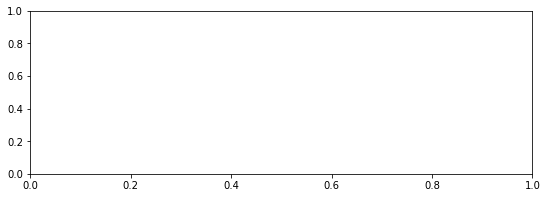

In [85]:
fig, axs = plt.subplots(1, 1, figsize = (9,3))
ell_radius_x = ma
ell_radius_y = me
ellipse = Ellipse((95.52,93.39),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    facecolor=None)

scale_x = np.sqrt(s[0][0])
scale_y = np.sqrt(s[1][1])

transf = transforms.Affine2D() \
    .rotate_deg() \
    .scale()


axs.add_patch(ellipse)


Se E é o maior eixo e M, o menor, então o comprimento de cada um é dado por:

$$
E \pm \sqrt{3695.52}\sqrt{12.59}*(0.9393,  0.342)^T
$$

$$
M \pm \sqrt{45.92}\sqrt{12.59}*(-0.342, 0.9393)^T
$$

Com a centróide:

$$
\bar{x} = (95.52, 93.39)
$$

## Item c 

In [41]:
def ic_bonf(sig, cov, sample_mean,p,n,names):
    q = t.ppf(1-sig/(2*p), df= n-1)
    cov_diag = cov.to_numpy().diagonal()
    res = []
    for i in range(0, len(sample_mean)):
        aux = q*np.sqrt(cov_diag[i]/n)
        inf = sample_mean[i] - aux
        sup = sample_mean[i] + aux
        res.append((names[i], inf,sup))
    
    return res


# item c - rever a funçao dos ics dps
ic_bear_bon = ic_bonf(0.05, cov, sample_mean, 6, n, names)
df_ic_bear_bonf = pd.DataFrame(ic_bear_bon, columns = ['Characteristic','Inf(95%)', 'Sup(95%)'])
df_ic_bear_bonf


,Characteristic,Inf(95%),Sup(95%)
0,Weight(kg),75.553314,115.486686
1,Body length (cm),154.993388,173.766612
2,Neck(cm),51.012291,60.367709
3,Girth,85.776138,101.003862
4,Head length(cm),16.878007,19.081993
5,Head width(cm),29.519173,32.740827


## Questão 5.20

In [42]:
#read data
df = np.loadtxt('tables\T5-12.dat', unpack = False)
df = pd.DataFrame(df, columns = ['x_1 (Tail)', 'x_2 (Wing Lenght)'])


## Item b

Calculando o intervalo de confiança utilizando $T^2$ de Hotelling

In [43]:
cov = df.cov()
sample_mean = df.mean().to_numpy()
sig = 0.05
p = 2
names = ['Tail length', 'Wing Length']
n = len(df)
ic_bear_bonf(sig, cov, sample_mean,p,n,names)


ic_bird_bon = ic_bonf(sig, cov, sample_mean, 2, n, names)
df_ic_bird_bonf = pd.DataFrame(ic_bird_bon, columns = ['IC Bonferroni','Inf(95%)', 'Sup(95%)'])
df_ic_bird_bonf

,IC Bonferroni,Inf(95%),Sup(95%)
0,Tail length,189.821560,197.422885
1,Wing Length,274.781922,284.773633


In [44]:
def ic_t2(sig, cov, sample_mean,p,n,names):
    q = f.ppf(1-sig,p, n-p)
    cov_diag = cov.to_numpy().diagonal()
    res = []
    for i in range(0, len(sample_mean)):
        aux = np.sqrt(p*(n-1)/(n-p))
        aux = aux*np.sqrt(q*cov_diag[i]/n)
        inf = sample_mean[i] - aux
        sup = sample_mean[i] + aux
        res.append((names[i], inf,sup))
    
    return res
# item c - rever a funçao dos ics dps
ic_bird_t2 = ic_t2(0.05, cov, sample_mean, 2, n, names)
df_ic_bird_t2 = pd.DataFrame(ic_bird_t2, columns = ['IC T2 Hotelling','Inf(95%)', 'Sup(95%)'])
df_ic_bird_t2

,IC T2 Hotelling,Inf(95%),Sup(95%)
0,Tail length,189.421724,197.822720
1,Wing Length,274.256351,285.299205


## Item c

Abaixo, apresenta-se os QQPlots para o comprimento da cauda dos pássaros e o comprimento de suas asas, respectivamente.

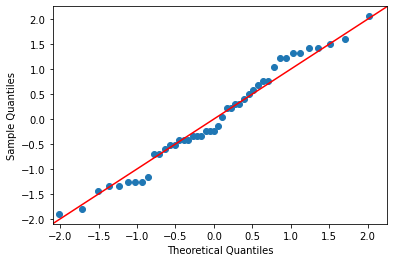

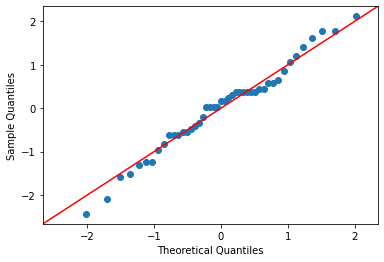

In [77]:

sm.qqplot(df['x_1 (Tail)'], fit=True, line="45")
sm.qqplot(df['x_2 (Wing Lenght)'], fit=True, line="45")
plt.show()

A porcentagem de observações menores do que o quantil de 50% da qui-quadrado com 2 graus de liberdade é de: 0.4


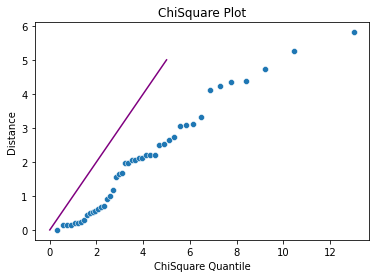

In [94]:
distances = normality_check(df)
chi_plot(distances)

Pela porcentagem de observações abaixo da distribuição qui-quadrado com os parâmetros mencionados e, consequentemente, pelo grande desvio dos dados em relação a reta de apoio no CHiSquare acima, os dados parecem não ter distribuição normal. Além disso, podemos observar como a distribuição do comprimento da asa e da cauda dos pássaros não se assemelha à característica forma de elipse da função normal bivariada.

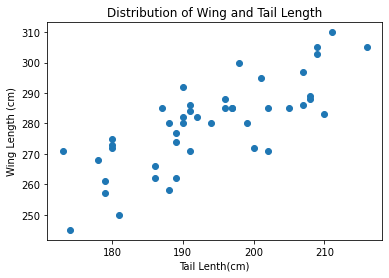

In [95]:
plt.scatter(df['x_1 (Tail)'],df['x_2 (Wing Lenght)'])
plt.title('Distribution of Wing and Tail Length')
plt.xlabel('Tail Lenth(cm)')
plt.ylabel('Wing Length (cm)')
plt.show()

## Questão 6.3

Inicialmente apresentamos os intervalos de confiança simultâneos de T2 de Hotelling e de Bonferroni sem a retirada do outlier.

In [57]:
#read data
df = np.loadtxt('tables\T6-1.dat', unpack = False)
df = pd.DataFrame(df, columns = ['x_1j1', 'x1j2', 'x2j1', 'x2j2' ])


df['diff_1'] = df['x_1j1'] - df['x2j1']
df['diff_2'] = df['x1j2'] - df['x2j2']

sample_mean = df[['diff_1','diff_2']].mean().to_numpy()
sample_cov = df[['diff_1','diff_2']].cov()
names = ['Diff BOD', 'Diff SS']
p = 2
n = len(df)
sig = 0.05

In [92]:
ic_lab = ic_t2(sig, sample_cov, sample_mean, p, n, names)
df_ic_lab_t2 = pd.DataFrame(ic_lab, columns = ['IC T2 Hotelling','Inf(95%)', 'Sup(95%)'])
df_ic_lab_t2

,IC T2 Hotelling,Inf(95%),Sup(95%)
0,Diff BOD,-22.453272,3.726000
1,Diff SS,-5.700119,32.245574


In [51]:
ic_lab_bon = ic_bonf(sig, sample_cov, sample_mean, p, n, names)
df_ic_lab_bonf = pd.DataFrame(ic_lab_bon, columns = ['Bonferroni','Inf(95%)', 'Sup(95%)'])
df_ic_lab_bonf


,Bonferroni,Inf(95%),Sup(95%)
0,Diff BOD,-20.573107,1.845835
1,Diff SS,-2.974903,29.520358


Com a retirada do outlier 8, temos os seguintes resultados:

In [58]:
df = df.drop([7], axis = 0)
sample_mean = df[['diff_1','diff_2']].mean().to_numpy()
sample_cov = df[['diff_1','diff_2']].cov()
names = ['Diff BOD', 'Diff SS']
p = 2
n = len(df)
sig = 0.05

ic_lab = ic_t2(sig, sample_cov, sample_mean, p, n, names)
df_ic_lab_t2 = pd.DataFrame(ic_lab, columns = ['IC T2 Hotelling','Inf(95%)', 'Sup(95%)'])
print('Sem outlier')
df_ic_lab_t2

Sem outlier


,IC T2 Hotelling,Inf(95%),Sup(95%)
0,Diff BOD,-23.700016,-0.299984
1,Diff SS,-5.503711,22.703711


In [59]:
ic_lab_bon = ic_bonf(sig, sample_cov, sample_mean, p, n, names)
df_ic_lab_bonf = pd.DataFrame(ic_lab_bon, columns = ['Bonferroni','Inf(95%)', 'Sup(95%)'])
print('Sem outlier')
df_ic_lab_bonf


Sem outlier


,Bonferroni,Inf(95%),Sup(95%)
0,Diff BOD,-21.917997,-2.082003
1,Diff SS,-3.355587,20.555587


Após a retirada da observação outlier, os intervalos de confiança não contém o valor 0, o que significa que, com 95% de confiança, rejeitamos $H_0: \delta = 0 $ e há diferença significativa entre os pares de média.

# Questão 6.8

In [8]:
treat1 = np.array([[6,5,8,4,7], [7,9,6,9,9]])
treat2 = np.array([[3,1,2], [3,6,3]])
treat3 = np.array([[2,5,3,2], [3,1,1,3]])

n1 = treat1.shape[1]
n2 = treat2.shape[1]
n3 = treat3.shape[1]
n = n1+n2+n3
ns = [n1,n2,n3]

#overall means
overall_mean = (np.sum(treat1, axis = 1)+np.sum(treat2, axis = 1) + np.sum(treat3, axis = 1))/(n)
overall_mean = overall_mean.reshape((2,1))

#treatment means
treat1_mean = treat1.mean(axis = 1).reshape((2,1))
treat2_mean = treat2.mean(axis = 1).reshape((2,1))
treat3_mean = treat3.mean(axis = 1).reshape((2,1))
treat_mean = [treat1_mean, treat2_mean, treat3_mean]

#treatment effect 
treat1_effect = treat1_mean - overall_mean
treat2_effect = treat2_mean - overall_mean
treat3_effect = treat3_mean- overall_mean


#residuals
res_t1 = treat1 - treat1_mean
res_t2 = treat2 - treat2_mean
res_t3= treat3 - treat3_mean

Para a primeira covariável, temos:

                 Observações    =     Média Geral    +       Média do Tratamento  +         Resíduos          

$$
\begin{pmatrix}
6 & 5 & 8 & 4 &7 \\    
3 & 1 & 2  \\
2 & 5 & 3 & 2 \\
\end{pmatrix}
=
\begin{pmatrix}
4 & 4 & 4 & 4 &4 \\    
4 & 4 & 4  \\
4 & 4 & 4 & 4 \\
\end{pmatrix}
+
\begin{pmatrix}
2 & 2 & 2 & 2 & 2 \\    
-2 & -2 & -2  \\
-1 & -1 & -1 & -1 \\
\end{pmatrix}
+
\begin{pmatrix}
0 & -1 & 2 & -2 & 1 \\    
1 & -1 & 0  \\
-1 & 2 & 0 & -1 \\
\end{pmatrix}
$$

Para a segunda covariável:                                

                 Observações    =     Média Geral    +       Média do Tratamento  +         Resíduos          

$$
\begin{pmatrix}
7 & 9 & 6 & 9 &9 \\    
3 & 6 & 3  \\
3 & 1 & 1 & 3 \\
\end{pmatrix}
=
\begin{pmatrix}
5 & 5 & 5 & 5 &5 \\    
5 & 5 & 5  \\
5 & 5 & 5 & 5 \\
\end{pmatrix}
+
\begin{pmatrix}
3 & 3 & 3 & 3 & 3 \\    
-1 & -1 & -1  \\
-3 & -3 & -3 & -3 \\
\end{pmatrix}
+
\begin{pmatrix}
-1 & 1 & -2 & 1 & 1 \\    
-1 & 2 & -1  \\
1 & -1 & -1 & 1 \\
\end{pmatrix}
$$

## Item b

Calculando a soma dos quadrados individuais e cruzadas:

In [126]:
# index relativo as variáveis
ssq_mean_1 = n*overall_mean[0][0]**2
ssq_mean_2 = n*overall_mean[1][0]**2

ssq_treat_1 = n1*treat1_effect[0][0]**2 + n2*treat2_effect[0][0]**2 + n3*treat3_effect[0][0]**2
ssq_treat_2 = n1*treat1_effect[1][0]**2 + n2*treat2_effect[1][0]**2 + n3*treat3_effect[1][0]**2

ssq_res_1 = np.sum(res_t1[0]**2) + np.sum(res_t2[0]**2) + np.sum(res_t3[0]**2)
ssq_res_2 = np.sum(res_t1[1]**2) + np.sum(res_t2[1]**2) + np.sum(res_t3[1]**2)

cross_mean = 12*overall_mean[0][0]*overall_mean[1][0]
cross_effect = n1*treat1_effect[0][0]*treat1_effect[1][0] + n2*treat2_effect[0][0]*treat2_effect[1][0] + n3*treat3_effect[0][0]*treat3_effect[1][0]
cross_res = np.sum(res_t1[0]*res_t1[1]) + np.sum(res_t2[0]*res_t2[1]) +np.sum(res_t3[0]*res_t3[1])



In [133]:
treatment = np.array([[ssq_treat_1, cross_effect], [cross_effect,ssq_treat_2]])
residual = np.array([[ssq_res_1, cross_res], [cross_res, ssq_res_2]])
total = treatment + residual


print('Matriz de tratamento: (B) \n', treatment)
print('Matriz de Resíduos: (W) \n', residual)
print('Total (B + W): \n', treatment + residual)
print('Graus de Liberdade Tratamento  (g-1): ', 2 )
print('Graus de Liberdade Resíduos  (n-g): ', 9 )

Matriz de tratamento: (B) 
 [[36. 48.]
 [48. 84.]]
Matriz de Resíduos: (W) 
 [[ 18. -13.]
 [-13.  18.]]
Total (B + W): 
 [[ 54.  35.]
 [ 35. 102.]]
Graus de Liberdade Tratamento  (g-1):  2
Graus de Liberdade Resíduos  (n-g):  9


In [136]:
print('|W| = ' ,det(residual))
print('|W + B| = ', det(total))
lamda = det(residual)/det(total)
p = 2
g = 3

|W| =  155.00000000000003
|W + B| =  4282.999999999997


In [137]:
lamda

0.0361895867382676

Calculando Lambda de Wilks: 

$$
\Lambda^*  = \frac{|W|}{|B++W|} = \frac{720}{4282.999} = 0.036
$$

em que

$$
\frac{1- \sqrt{\Lambda^*}}{\sqrt{\Lambda^*}}\frac{\sum n_l - g - 1}{g-1} \sim F_{2(g-1),2(\sum n_l - g - 1)} = F_{4,16}
$$

Calculando a estatística de teste, obtemos que:

In [138]:
estat = ((1-np.sqrt(lamda))/np.sqrt(lamda))*((n-g-1)/(g-1))
alpha = 0.01
f_crit = f.ppf(1-alpha,4,16)
print((f'Estatística de teste = {estat} e quantil de 99% da F = {f_crit}'))

Estatística de teste = 17.02655770762912 e quantil de 99% da F = 4.772577999723211


Como a estatística de teste é maior do que o quantil da $F_{4,16}$, rejeitamos a hipótese nula e concluimos que há diferença entre as médias dos diferentes tratamento, ao nível de 1% de significância.

Usando a aproximação de Bartlett:
    

$$
-(n-1-\frac{p+g}{2})\log(\Lambda^*) \sim \chi^2_{p(g-1)}
$$

In [142]:

bartlett = -(n-1-(p+g)/2)*np.log(lamda)
chi = chi2.ppf(0.99,p*(g-1))

print(f'Estatística de teste: {bartlett} e quantil de 99% da Chiquadrado = {chi}')

Estatística de teste: 28.21136281591705 e quantil de 99% da Chiquadrado = 13.276704135987622


Como nossa estatística de teste é maior do que o quantil da regiào crítica, também rejeitamos a hipótese nula e concluimos que há diferença entre média pelos menos entre dois tratamentos.